<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [6]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
!pip install bs4
!pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.0-cp313-cp313-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.4.0-cp313-cp313-win_amd64.whl (102 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)


In [4]:
# Your code here
import pandas as pd
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests

Download the webpage at the url


In [7]:
#your code goes here
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text 

Create a soup object


In [8]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'
table = soup.find('table') # in html table is represented by the tag <table>

Scrape the `Language name` and `annual average salary`.


In [53]:
#your code goes here
langs = []
salaries = []
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    lang_name = cols[1].getText() # store the value in column 3 as color_name
    salary = cols[3].getText() # store the value in column 4 as color_code
    langs = langs + [lang_name]
    salaries = salaries + [salary.replace(',', '').replace('$', '')]
langs = langs[1:]
salaries = salaries[1:]
salary = [float(x) for x in salaries]

Save the scrapped data into a file named *popular-languages.csv*


In [ ]:
# your code goes here
lang_salary = pd.DataFrame({'Languages': langs, 'Salary': salary})
lang_salary['Salary']

Languages     object
Salary       float64
dtype: object

<Axes: xlabel='Languages'>

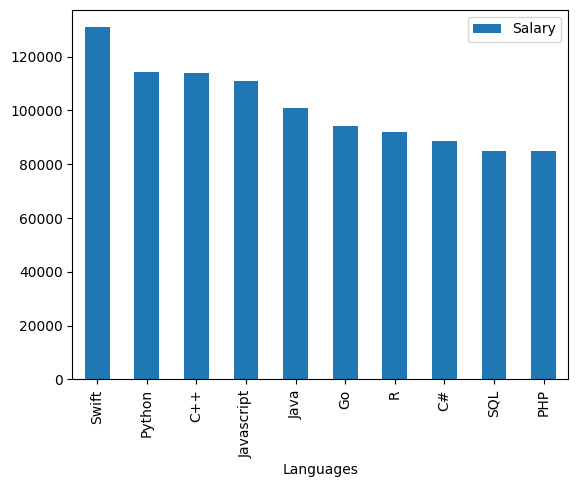

In [59]:
lang_salary.sort_values("Salary", ascending=False).plot(kind='bar', x='Languages', y ='Salary', )

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
